CIFAR-10 Dataset as it suggests has 10 different categories of images in it. There is a total of 60000 images of 10 different classes naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.

## Importing the libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

##Loading the dataset

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

## Preparing the dataset

 Normalizing the training data :
 Image has 3 channels(R,G,B) and each value in the channel can range from 0 to 255.
Normalizing the images to a number from 0 to 1 by dividing it by 255.

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

Converting the y_train 2D array for our classification model into 1D array

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plotting some images to see what they are

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

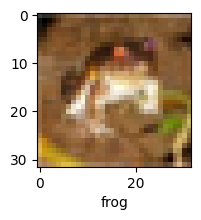

In [9]:
plot_sample(X_train, y_train, 0)

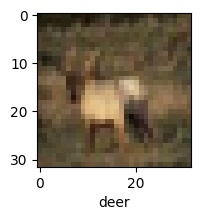

In [10]:
plot_sample(X_train, y_train, 3)

## Building a CNN to train our images

1. Create the convolutional base - : a stack of Conv2D and MaxPooling2D layers.
2. Add Dense layers on top

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

Here's the complete architecture of your model:

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

3. Compile and train the model

In [13]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6286 - accuracy: 0.7813
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6006 - accuracy: 0.7911
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.5683 - accuracy: 0.8019
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5498 - accuracy: 0.8070
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5252 - accuracy: 0.8155
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5008 - accuracy: 0.8242
Epoch 7/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.4801 - accuracy: 0.8288
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.4626 - accuracy: 0.8365
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.4414 - accuracy: 0.8437
Epoch 10/10
1563/1563 [==============================] - 59s 38m

## Evaluating the model

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9425 - accuracy: 0.6874


[0.94254070520401, 0.6873999834060669]